<a href="https://colab.research.google.com/github/eSeohyeon/2025-1_CV/blob/main/CV_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW#2 2021041076 이서현

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

HW#2-1

In [8]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif'

--2025-04-10 13:16:27--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 589115 (575K) [image/tiff]
Saving to: ‘Fig0309(a)(washed_out_aerial_image).tif’

Fig0309(a)(washed_o 100%[===================>] 575.31K  --.-KB/s    in 0.05s   

2025-04-10 13:16:28 (11.7 MB/s) - ‘Fig0309(a)(washed_out_aerial_image).tif’ saved [589115/589115]



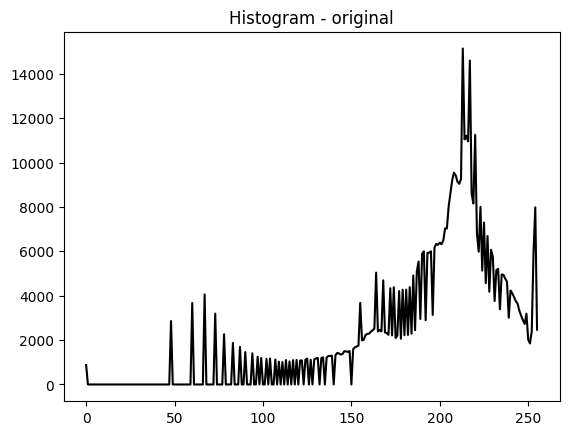

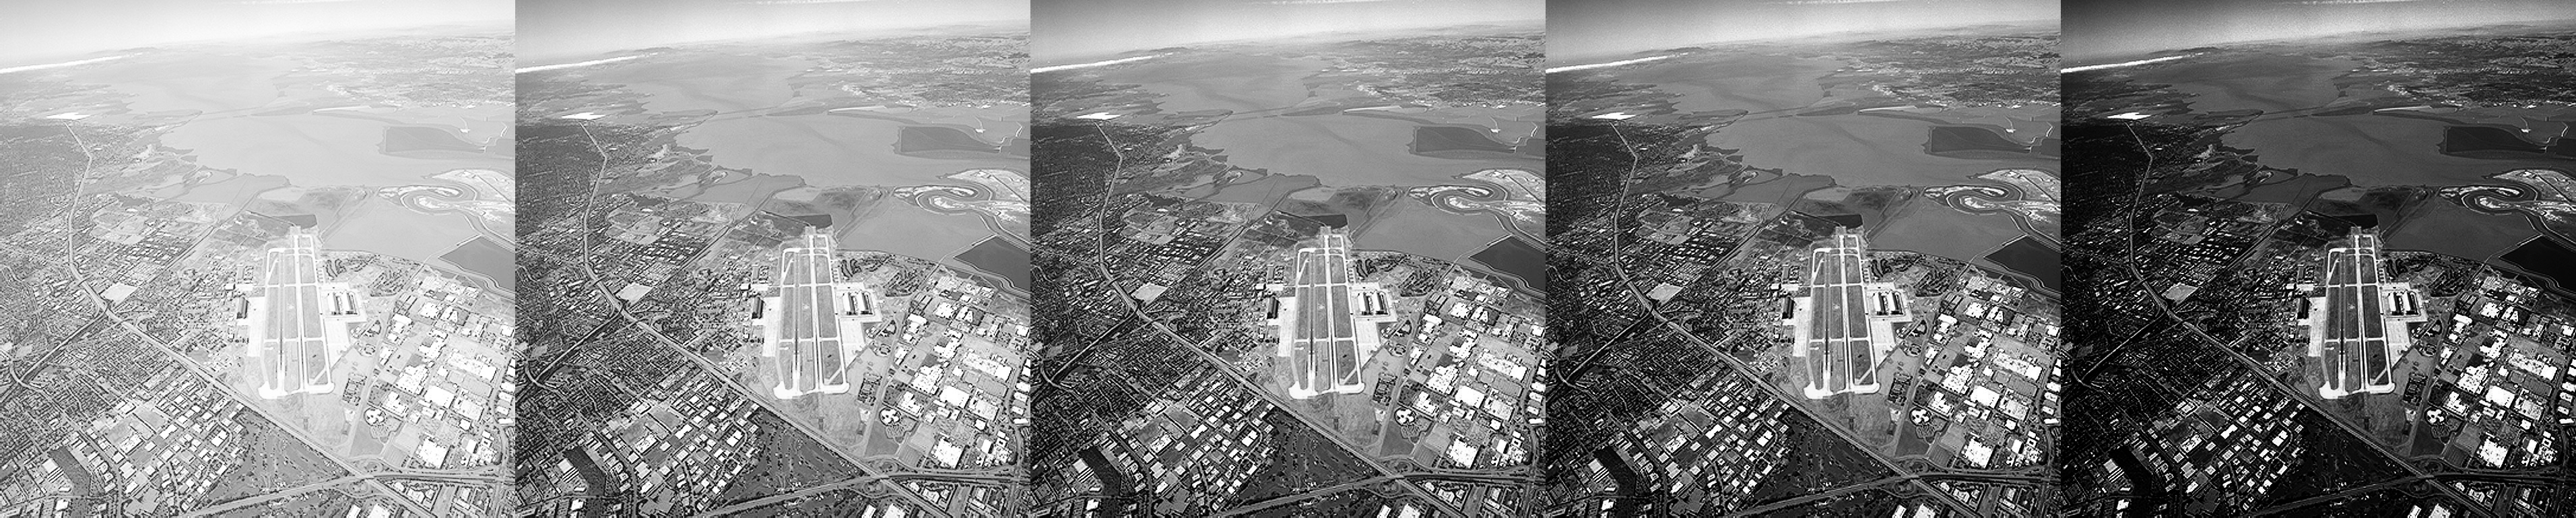

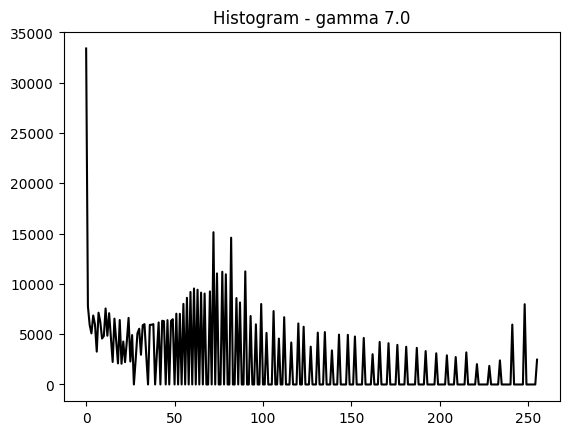

In [24]:
img = cv2.imread('Fig0309(a)(washed_out_aerial_image).tif', cv2.IMREAD_GRAYSCALE)
hist_original = cv2.calcHist([img], [0], None, [256], [0, 256]) # 원본 영상의 히스토그램 계산
plt.plot(hist_original, color='black')
plt.title('Histogram - original')
plt.show()

# 원본 영상의 히스토그램을 통해 밝기가 밝은 쪽에 많이 치우쳐져 있음을 확인.
# 영상의 밝기를 낮추기 위해 감마 보정을 사용.

def gamma(image, gamma):
    image_normal = image/255.0 # 픽셀 정규화
    return np.uint8(255*(image_normal**gamma))

# 감마 보정( 2.0, 3.0, 7.0, 4.0 )
gamma1 = gamma(img, 2.0)
gamma2 = gamma(img, 3.0)
# 2.0과 3.0의 차이가 생각보다 크지 않아서 한 번에 7.0까지 올려보았다.
gamma7 = gamma(img, 7.0)
gamma4 = gamma(img, 4.0)

show = np.hstack((img, gamma1, gamma2, gamma4, gamma7))
cv2_imshow(show)
# 감마 값이 커질수록 영상이 어두워지는 것을 확인할 수 있다.

hist_gamma7 = cv2.calcHist([gamma7], [0], None, [256], [0, 256])
plt.plot(hist_gamma7, color='black')
plt.title('Histogram - gamma 7.0')
plt.show()
# 감마값이 7.0인 영상의 히스토그램을 보면 원본 영상에 비해 밝기 값이 어두운 쪽으로 많이 치우쳐져 있음을 확인할 수 있다.

 HW#2-2